# OCR 실습

In [70]:
import requests
from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt

In [71]:
subscription_key = '234a97e32f8447c19fbf3836053ff32c'

In [72]:
vision_base_url = 'https://daeguaivision00.cognitiveservices.azure.com/vision/v2.0/'

In [73]:
ocr_url = vision_base_url + 'ocr'

## 분석할 이미지를 셋팅한다.

In [74]:
image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Atomist_quote_from_Democritus.png/338px-Atomist_quote_from_Democritus.png'

In [75]:
img = Image.open(BytesIO(requests.get(image_url).content))

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001B0F43FB4A0>

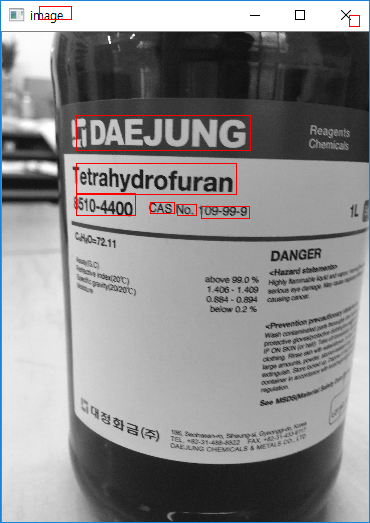

In [76]:
img

In [77]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key} # key 셋팅
params  = {'language': 'unk', 'detectOrientation': 'true'} # 어떤 언어인지, 'unk'는 unknown을 뜻함
#detectOrientation 기울기 방향을 true라고 하면 기울어져있으면 바로 펴서 인식하기 시작한다.
# false면 기울어져도 detect 안하겠다.
data    = {'url': image_url}

In [21]:
response = requests.post(ocr_url,
                        headers=headers,
                        params=params,
                        json=data)


In [22]:
analysis = response.json()

In [23]:
analysis

{'language': 'fr',
 'textAngle': 0.03316125578789284,
 'orientation': 'Up',
 'regions': [{'boundingBox': '39,6,32,13',
   'lines': [{'boundingBox': '39,6,32,13',
     'words': [{'boundingBox': '39,6,32,13', 'text': 'image'}]}]},
  {'boundingBox': '349,15,10,11',
   'lines': [{'boundingBox': '349,15,10,11',
     'words': [{'boundingBox': '349,15,10,11', 'text': 'x'}]}]},
  {'boundingBox': '76,115,174,103',
   'lines': [{'boundingBox': '76,115,174,35',
     'words': [{'boundingBox': '76,115,174,35', 'text': '5DAEJUNG'}]},
    {'boundingBox': '76,163,160,31',
     'words': [{'boundingBox': '76,163,160,31', 'text': 'Tetrahydrofuran'}]},
    {'boundingBox': '76,193,173,25',
     'words': [{'boundingBox': '76,193,59,22', 'text': '8510-4400'},
      {'boundingBox': '150,202,24,11', 'text': 'CAS'},
      {'boundingBox': '177,204,19,11', 'text': 'Na'},
      {'boundingBox': '201,206,48,12', 'text': "'09-99-9"}]}]}]}

In [63]:
lines = [i['lines'] for i in analysis['regions']]
lines

[[{'boundingBox': '39,6,32,13',
   'words': [{'boundingBox': '39,6,32,13', 'text': 'image'}]}],
 [{'boundingBox': '349,15,10,11',
   'words': [{'boundingBox': '349,15,10,11', 'text': 'x'}]}],
 [{'boundingBox': '76,115,174,35',
   'words': [{'boundingBox': '76,115,174,35', 'text': '5DAEJUNG'}]},
  {'boundingBox': '76,163,160,31',
   'words': [{'boundingBox': '76,163,160,31', 'text': 'Tetrahydrofuran'}]},
  {'boundingBox': '76,193,173,25',
   'words': [{'boundingBox': '76,193,59,22', 'text': '8510-4400'},
    {'boundingBox': '150,202,24,11', 'text': 'CAS'},
    {'boundingBox': '177,204,19,11', 'text': 'Na'},
    {'boundingBox': '201,206,48,12', 'text': "'09-99-9"}]}]]

In [66]:
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos :
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

[{'boundingBox': '39,6,32,13', 'text': 'image'},
 {'boundingBox': '349,15,10,11', 'text': 'x'},
 {'boundingBox': '76,115,174,35', 'text': '5DAEJUNG'},
 {'boundingBox': '76,163,160,31', 'text': 'Tetrahydrofuran'},
 {'boundingBox': '76,193,59,22', 'text': '8510-4400'},
 {'boundingBox': '150,202,24,11', 'text': 'CAS'},
 {'boundingBox': '177,204,19,11', 'text': 'Na'},
 {'boundingBox': '201,206,48,12', 'text': "'09-99-9"}]